This notebook is to demonstrate univariate linear regression and the corresponding cost function, impacted by the W and b terms (weight and bias).

Univariate linear regression function is defined as follows: $f_{w,b}(x) = wx+b$, and consequently, the cost function, based on the mean-square error (MSE) would be the following: $\frac{1}{2m}\sum_{i=1}^{m}(f_{w,b}(x^{(i)}) - y^{(i)})^2$. We can represent $f_{w,b}(x^{(i)})$ by $ŷ^{(i)}$ where ŷ is the *predicted* value of x.

# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate random data based on specified w and b

Here we will define what the actual w and b are to generate a sample dataset.

In [30]:
np.random.seed(42) # Set a random seed for reproducibility

true_w = 2
true_b = 5

# Generate synthetic data - input features
N = 50 # number of samples
X = np.linspace(0, 50, N) # feature values

# Generate target values
y = true_w * X + true_b

# Plot the input data

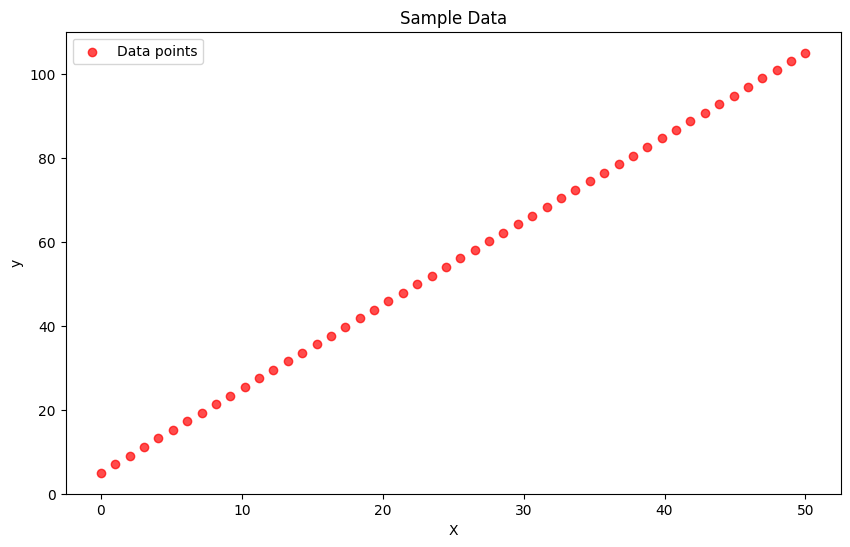

In [31]:
plt.figure(figsize=(10, 6))
plt.scatter(X, y, label='Data points', color='red', alpha=0.7)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Sample Data')
plt.legend()
plt.show()

Now let's try some other values of W and b and see how they fit. As mentioned previously, we will use the MSE to compute the error and visualize the cost function.

In [43]:
test_w = 1.5
test_b = 32
y_hat = test_w * X + test_b

Helper function to compute the MSE

In [44]:
def compute_mse(X, y, w, b):
    """
    Compute Mean Squared Error (MSE) between predicted and actual values.
    """
    y_hat = w * X + b
    mse = np.mean((y - y_hat) ** 2)
    return mse

Now let's plot and see the fit

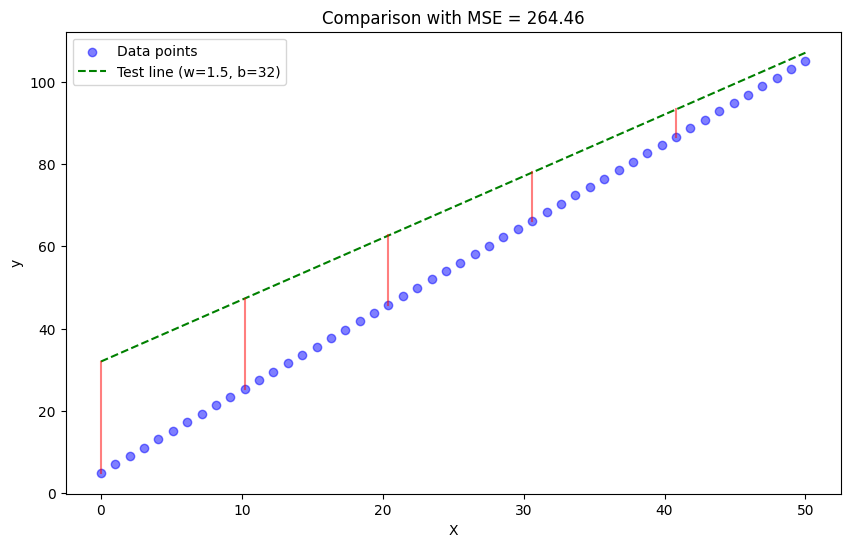

In [45]:
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', alpha=0.5, label='Data points')
plt.plot(X, y_hat, 'g--', label=f'Test line (w={test_w}, b={test_b})')

for i in range(len(X)): # plot some error lines to visualize
    if i % 10 == 0:
        plt.plot([X[i], X[i]], [y[i], y_hat[i]], 'r-', alpha=0.5)

plt.xlabel('X')
plt.ylabel('y')
plt.title(f'Comparison with MSE = {compute_mse(X, y, test_w, test_b):.2f}')
plt.legend()
plt.show()

We can see that the line is not properly aligned with the data points. We know this because we initially defined the w = 2 and b = 5, but here we've plotted w = 1.5 and b = 32. Now let's plot the cost function J to see the best combination of W and b (the minimum).

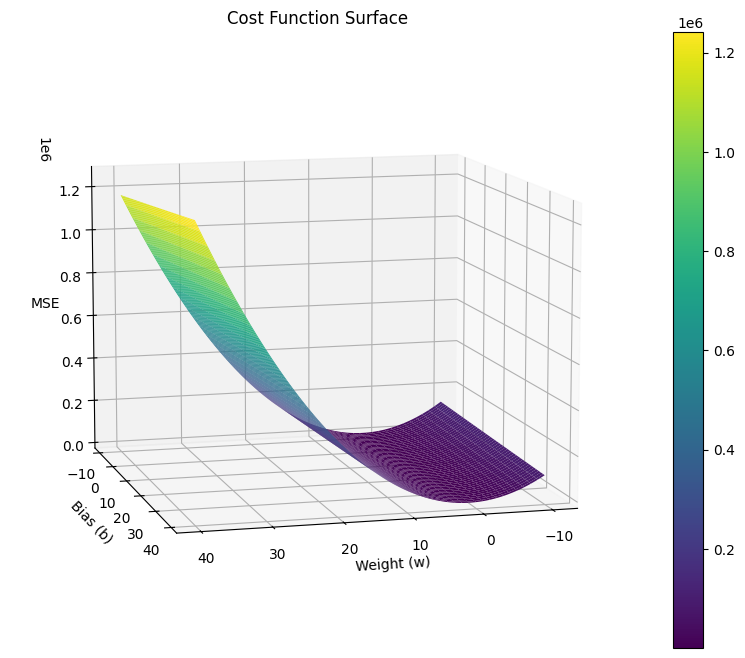

In [55]:
w_range = np.arange(-10, 40, 0.25)
b_range = np.arange(-10, 40, 0.25)
W, B = np.meshgrid(w_range, b_range)
Z = np.zeros(W.shape)

for i in range(len(w_range)):
    for j in range(len(b_range)):
        Z[i,j] = compute_mse(X, y, W[i,j], B[i,j])

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(W, B, Z, cmap='viridis')
ax.set_xlabel('Weight (w)')
ax.set_ylabel('Bias (b)')
ax.set_zlabel('MSE')
ax.set_title('Cost Function Surface')
fig.colorbar(surf)
ax.view_init(elev=10, azim=75)
plt.show()

Let's plot a contour plot as well.

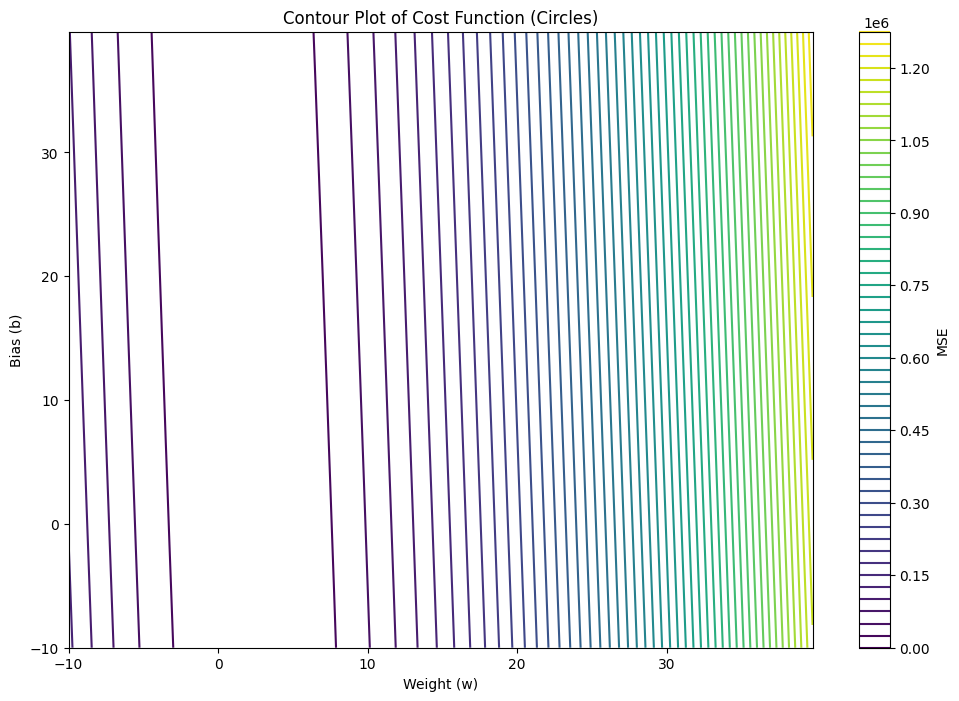

In [56]:
plt.figure(figsize=(12, 8))
contour = plt.contour(W, B, Z, levels=N, cmap='viridis')
plt.colorbar(contour, label='MSE')
plt.xlabel('Weight (w)')
plt.ylabel('Bias (b)')
plt.title('Contour Plot of Cost Function (Circles)')
plt.show()


Now let's compute the actual lowest possible MSE (the minimum) and its corresponding W and b.

In [57]:
min_idx = np.unravel_index(Z.argmin(), Z.shape)
best_w = W[min_idx]
best_b = B[min_idx]
print(f"Best weight: {best_w}, Best bias: {best_b}")
print(f"Minimum MSE: {Z[min_idx]}")

Best weight: 2.0, Best bias: 5.0
Minimum MSE: 0.0


As you can see, we landed on the initial w and b we originally set! That is expected!
Now let's quickly try and do it with using scikit-learn.

In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

Next, we need to reshape X for sklearn.

In [60]:
X.shape

(50,)

In [62]:
X = X.reshape(-1, 1)
X.shape

(50, 1)

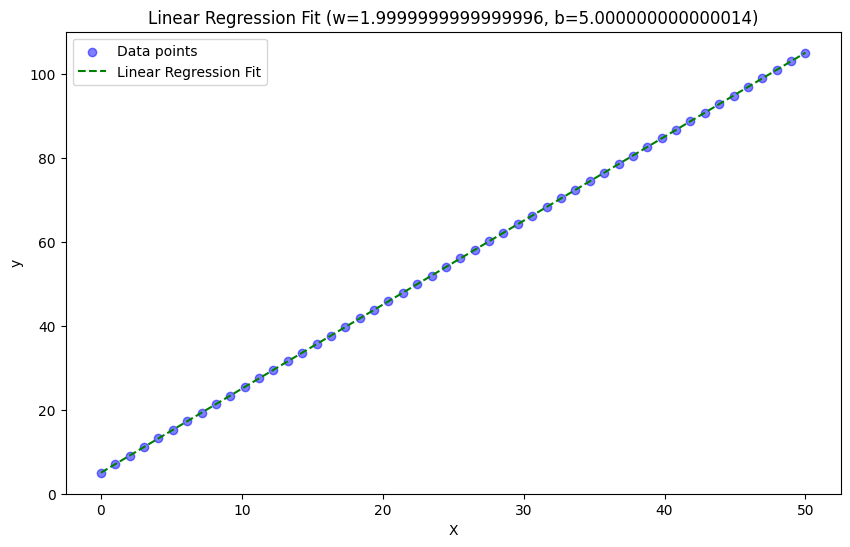

Linear Regression Coefficient: 1.9999999999999996
Linear Regression Intercept: 5.000000000000014
Linear Regression MSE: 5.900679571053168e-29


In [63]:
lr = LinearRegression()
lr.fit(X, y)
y_pred = lr.predict(X)
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', alpha=0.5, label='Data points')
plt.plot(X, y_pred, 'g--', label='Linear Regression Fit')
plt.xlabel('X')
plt.ylabel('y')
plt.title(f'Linear Regression Fit (w={lr.coef_[0]}, b={lr.intercept_})')
plt.legend()
plt.show()
print(f"Linear Regression Coefficient: {lr.coef_[0]}")
print(f"Linear Regression Intercept: {lr.intercept_}")
print(f"Linear Regression MSE: {mean_squared_error(y, y_pred)}")

Pretty simple!